#FaceMask detection model

**Build your CNN model using Keras to identify whether a person is wearing a faceMask or not**

###**1**.   **The Setup phase**


In [1]:
#---------------------------The import statments-----------------------------------------

import pandas as pd                               #reading, writing and manipulating the data (using tables)
import numpy as np                                #Library for linear algebra and some probabiltity (raw data) 
import tensorflow as tf                           #library for numerical computation that makes machine learning faster and easier
from tensorflow import keras                      #we may not add this since keras is already thier in tensorflow
from tensorflow.keras.models import Sequential    #To create the sequential layer
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  #To create the model
from tensorflow.keras.optimizers import Adam      #Adam optimizer
#from tensorflow.keras.metrics import categorical_crossentropy   #This is the crossentropy metric class to be used when there are multiple label classes (2 or more)
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize
#from sklearn.metrics import confusion_matrix      #To evaluate the accuracy of a classification
#from sklearn.model_selection import train_test_split #To split data arrays into two subsets: for training data and for testing data
#import itertools                                  #A set of functions for working with iterable (sequence-like) data sets
#import os                                         #provides functions for interacting with the OS
#import shutil                                     #functions of high-level operations on files and collections of files
#import random                                     #Generate random numbers
#import glob                                       #Retrieve files/pathnames matching a specified pattern
import matplotlib.pyplot as plt                   #library to plot graphs
#import warnings                                   #Alert the user of some condition in a program, where that condition (normally) doesn't warrant raising an exception and terminating the program
from google.colab import files                    #To be able to upload files
#warnings.simplefilter(action='ignore', category=FutureWarning)
#%matplotlib inline                               

Here I will upload the dataset file called `"data"` that has 2 subfolders `"with"` and `"without`" and unzip




In [2]:
#upload file
uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
#unzipping the folder
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/without/01003_Mask_Mouth_Chin.jpg  
  inflating: data/without/01004_Mask_Mouth_Chin.jpg  
  inflating: data/without/01005_Mask_Mouth_Chin.jpg  
  inflating: data/without/01006_Mask_Mouth_Chin.jpg  
  inflating: data/without/01007_Mask_Mouth_Chin.jpg  
  inflating: data/without/01008_Mask_Mouth_Chin.jpg  
  inflating: data/without/01009_Mask_Mouth_Chin.jpg  
  inflating: data/without/01010_Mask_Mouth_Chin.jpg  
  inflating: data/without/01011_Mask_Mouth_Chin.jpg  
  inflating: data/without/01012_Mask_Mouth_Chin.jpg  
  inflating: data/without/01013_Mask_Mouth_Chin.jpg  
  inflating: data/without/01014_Mask_Mouth_Chin.jpg  
  inflating: data/without/01015_Mask_Chin.jpg  
  inflating: data/without/01016_Mask_Mouth_Chin.jpg  
  inflating: data/without/01017_Mask_Mouth_Chin.jpg  
  inflating: data/without/01018_Mask_Mouth_Chin.jpg  
  inflating: data/without/01019_Mask_Chin.jpg  
  inflating: data/without/01020_Mask_Mouth_

In [4]:
#delete the zip file as it is not needed anymore
!rm data.zip

In [5]:
# setting the batch size and the epochs

batch_size = 8
epochs = 30

Splitting the images (80% training and 20% 
validation) and Data augmanting it



In [6]:


directory = 'data'

train_datagen = ImageDataGenerator(validation_split=0.2,        # Splits the data into training (80%) and validation (20%)
                                   rescale = 1./255,            # Multiple the colors by a number between 0-1 to process data faster
                                   rotation_range=40,           #rotate the images
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')        #add new pixels when the image is rotated or shifted

#test_datagen = ImageDataGenerator(rescale = 1./255)            

train_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                seed=2020,                      # to make the result reproducible
                                subset = 'training')            # Specify this is training set

validation_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                subset = 'validation')            # Specify this is training set



Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


**Display a batch of the images used in the training and thier labels**

In [7]:
#generate a batch of images and labels from the training set
imgs, labels = next(train_generator)

In [8]:
#plotting function

def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

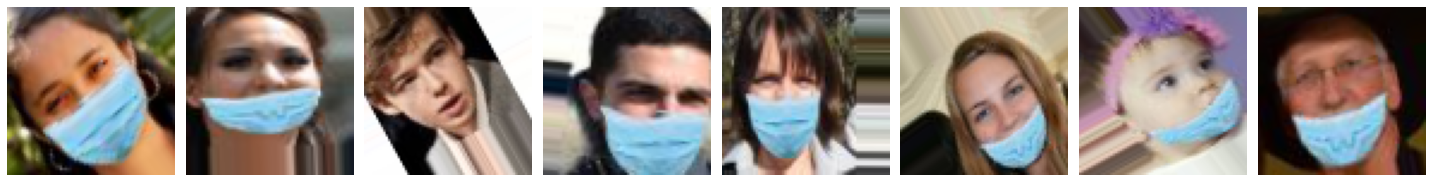

[0. 1. 1. 0. 0. 1. 1. 1.]


In [9]:
#displaying the images and thier labels where as 0 with mask and 1 without mask
plotImages(imgs);
print(labels);





###**2. Build and train the CNN**





Sequencial is a list of the layers of the model we want to create. Here it consists of

*   Conv2D Layer
> * **The filter** parameter means the number of this layer's output filters 
> *   **The kernal_size** parameter is commonly used 3*3
> *   **The activation** parameter refers to the type of activation function
> *   **The padding** parameter is enabled to zero-padding
> *   **The input_shape** parameter has pixel high and pixel wide and have the 3 color channels: RGB

*   MaxPool2D Layer
> To pool and reduce the dimensionlaity of the data
*   Flatten Layer
> * flatten is used to flatten the input to a 1D vector then passed to dense

*   Dense Layer (The output layer)
> * **The units** parameter means that it has 2 nodes one for with and one for without because we want a binary output 
> *   **The activation** parameter we use the softmax activation function on our output so that the output for each sample is a probability distribution over the outputs of with and without mask






In [10]:
#create the model layers

model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])

#check out the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

Compile the model using the **Adam** optimizer with **learning rate** of `0.0001`, a **loss** of `binary_crossentropy`, and we'll look at `accuracy` as our performance **metric**.

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  

We use the `train_generator` because we are now only training the data. The 
validation data is the `validation_generator` 


In [12]:
#Training the model
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator)   #add the steps ,steps_per_epoch = 8470 // batch_size, , validation_steps= 1194 // batch_size
#and the epochs is **(train_batch element number/ batch)**  (check this out)

Epoch 1/30
1002/1002 [==============================] - 25s 25ms/step - loss: 0.4204 - accuracy: 0.8005 - val_loss: 0.3810 - val_accuracy: 0.8387
Epoch 2/30
1002/1002 [==============================] - 24s 24ms/step - loss: 0.2759 - accuracy: 0.8869 - val_loss: 0.3685 - val_accuracy: 0.8477
Epoch 3/30
1002/1002 [==============================] - 24s 24ms/step - loss: 0.2268 - accuracy: 0.9149 - val_loss: 0.2407 - val_accuracy: 0.9081
Epoch 4/30
1002/1002 [==============================] - 24s 24ms/step - loss: 0.1926 - accuracy: 0.9287 - val_loss: 0.2549 - val_accuracy: 0.8981
Epoch 5/30
1002/1002 [==============================] - 24s 24ms/step - loss: 0.1718 - accuracy: 0.9336 - val_loss: 0.1761 - val_accuracy: 0.9351
Epoch 6/30
1002/1002 [==============================] - 24s 24ms/step - loss: 0.1600 - accuracy: 0.9446 - val_loss: 0.1861 - val_accuracy: 0.9266
Epoch 7/30
1002/1002 [==============================] - 24s 24ms/step - loss: 0.1461 - accuracy: 0.9448 - val_loss: 0.1484 -



### **3. Plotting the loss and accuracy of training vs validation**






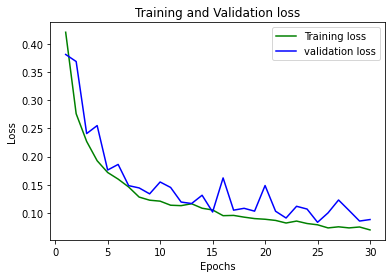

In [13]:
#Plotting the loss of validation and training 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epochs+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

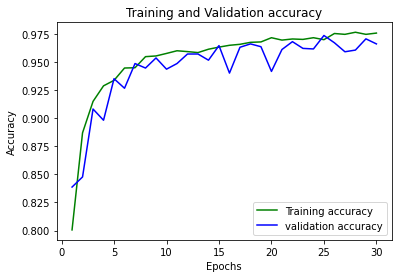

In [14]:
#Plotting the accuracy of validation and training 
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **4. Testing the CNN model**


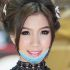



The person is not wearing a mask.



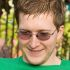



The person is not wearing a mask.



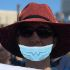



The person is not wearing a mask.



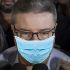



The person is wearing a mask. 



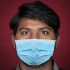



The person is wearing a mask. 



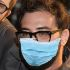



The person is wearing a mask. 



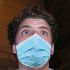



The person is wearing a mask. 



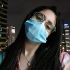



The person is wearing a mask. 



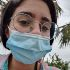



The person is wearing a mask. 



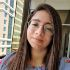



The person is not wearing a mask.



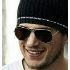



The person is not wearing a mask.



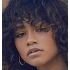



The person is not wearing a mask.



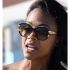



The person is not wearing a mask.



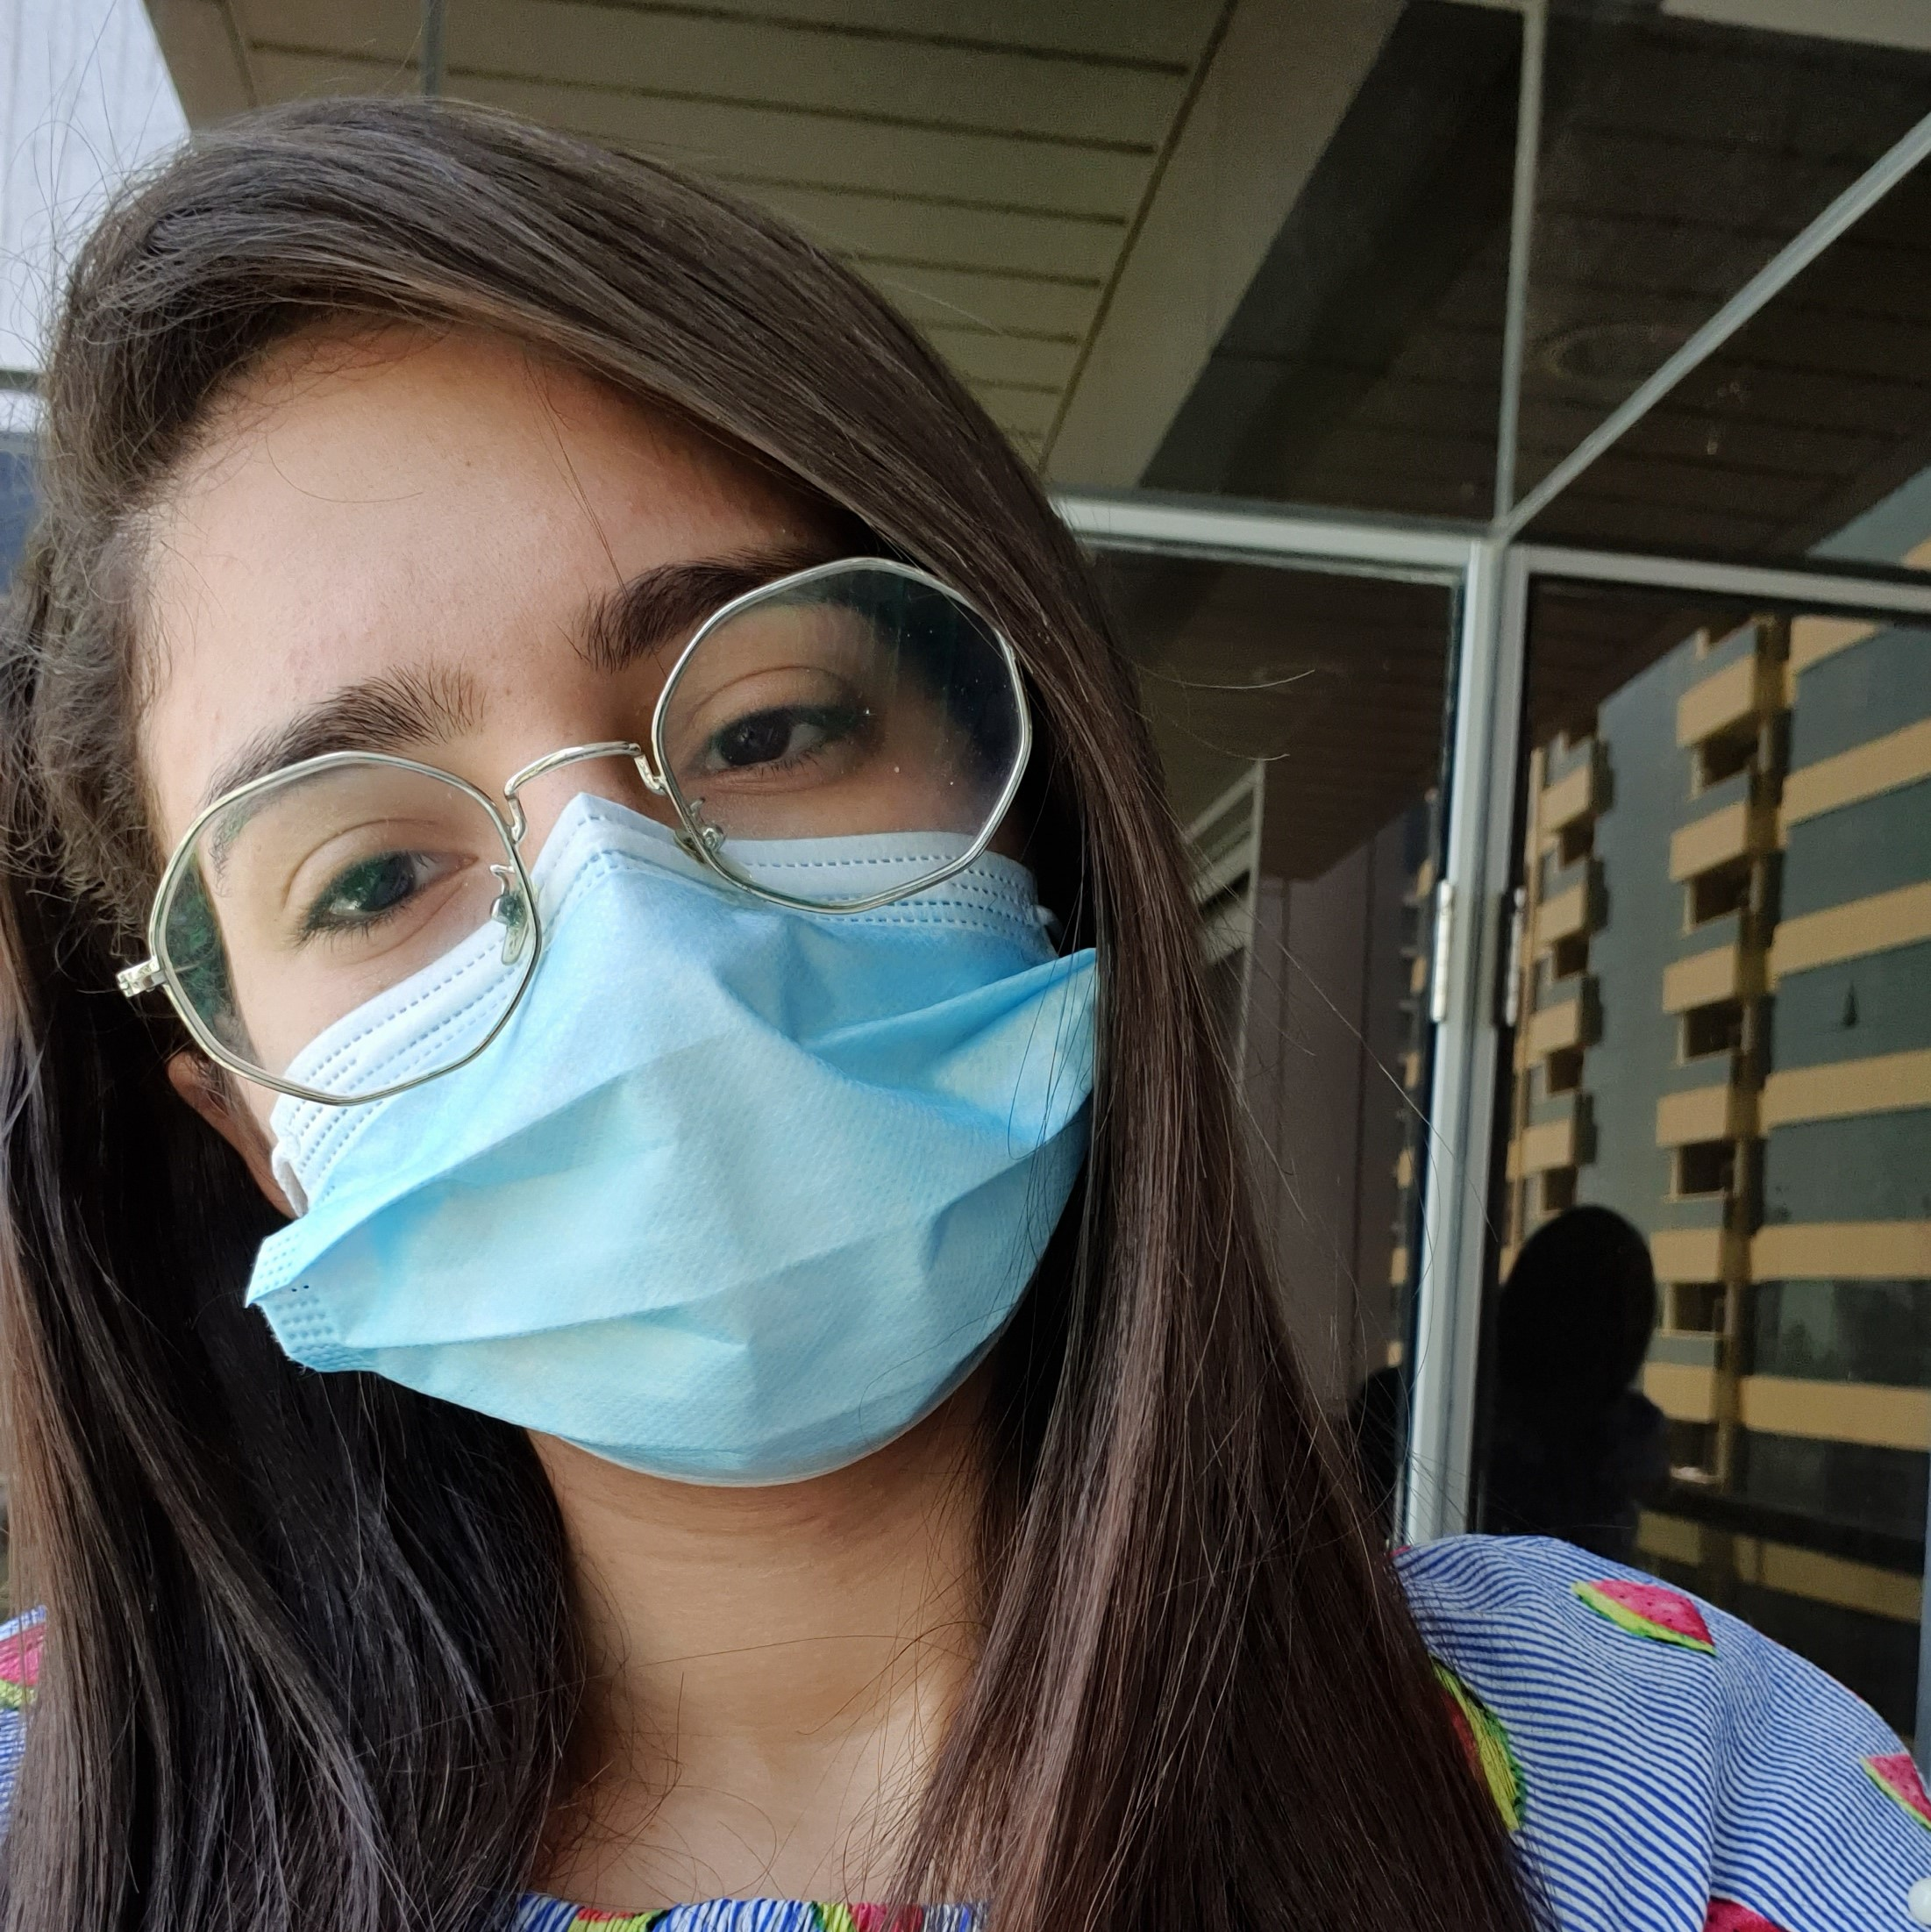



The person is not wearing a mask.



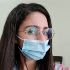



The person is not wearing a mask.



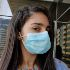



The person is wearing a mask. 



In [19]:
from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
for i in range (1,17):
  img_directory = str(i) + '.jpg'
  img_pred = image.load_img(img_directory, target_size = (70, 70))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)

  prediction = model.predict(img_pred)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if(int(prediction[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")